# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Classified Data", index_col=0)

In [3]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaled_data = scaler.fit_transform(df.iloc[:,:-1])

In [7]:
pd.DataFrame(scaled_data)

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [8]:
pd.DataFrame(scaled_data).mean()

0    1.119105e-16
1   -2.939871e-16
2   -1.203482e-16
3   -1.882938e-16
4   -6.057377e-16
5    3.552714e-17
6    2.255973e-16
7   -4.760636e-16
8    3.197442e-16
9    4.503065e-16
dtype: float64

In [9]:
pd.DataFrame(scaled_data).std()

0    1.0005
1    1.0005
2    1.0005
3    1.0005
4    1.0005
5    1.0005
6    1.0005
7    1.0005
8    1.0005
9    1.0005
dtype: float64

In [10]:
scaled_data

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train , X_test, Y_train, Y_test = train_test_split(scaled_data,df["TARGET CLASS"],test_size=0.3,random_state=42)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [15]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = KNN.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
confusion_matrix(Y_test, y_pred)

array([[134,   8],
       [ 11, 147]], dtype=int64)

In [19]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [20]:
error_rates = []
for i in range(1,40):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train,Y_train)
    y_pred = KNN_i.predict(X_test)
    error_rates.append(np.mean(y_pred != Y_test))

In [21]:
error_rates

[0.06333333333333334,
 0.08333333333333333,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.056666666666666664,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05333333333333334,
 0.06,
 0.056666666666666664,
 0.05333333333333334,
 0.05333333333333334,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

Text(0, 0.5, 'Error rate')

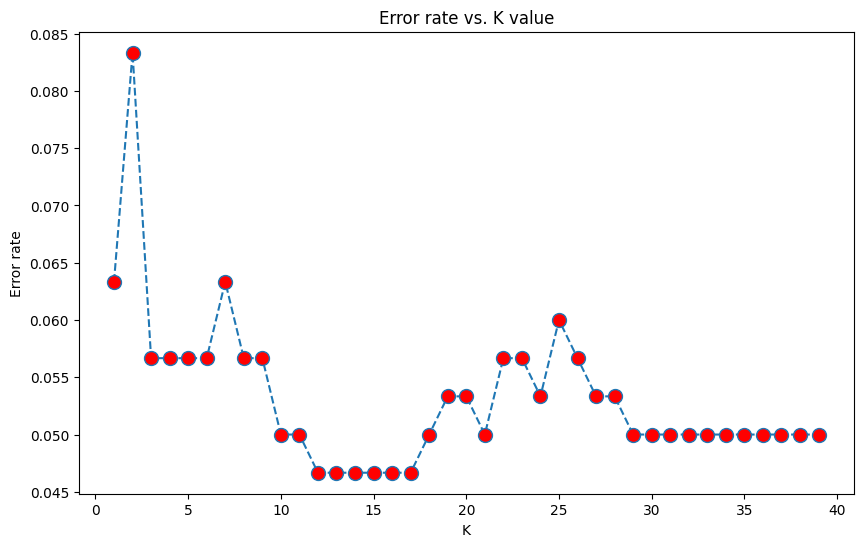

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates,linestyle="--",marker="o",markersize=10,markerfacecolor="red")
plt.title("Error rate vs. K value")
plt.xlabel("K")
plt.ylabel("Error rate")

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [26]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
KNN_1 = KNeighborsClassifier(n_neighbors=1)
KNN_1.fit(X_train,Y_train)
y_pred = KNN_1.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[134,   8],
       [ 11, 147]], dtype=int64)

In [27]:
# NOW WITH the best K
KNN_15 = KNeighborsClassifier(n_neighbors=15)
KNN_15.fit(X_train,Y_train)
y_pred = KNN_15.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[136,   6],
       [  8, 150]], dtype=int64)

In [28]:
KNN_5 = KNeighborsClassifier(n_neighbors=5)
KNN_5.fit(X_train,Y_train)
y_pred = KNN_5.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[135,   7],
       [ 10, 148]], dtype=int64)